In [174]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import numpy as np
from scipy import stats

In [175]:
hospitalspending_2015 = "resource/Medicare_Hospital_Spending_by_Claim (2015).csv"

hospitalspending_2015_df = pd.read_csv(hospitalspending_2015)
hospitalspending_2015_df

,Hospital_Name,Provider_ID,State,Period,Claim_Type,Avg_Spending_Per_Episode_Hospital,Avg_Spending_Per_Episode_State,Avg_Spending_Per_Episode_Nation,Percent_of_Spending_Hospital,Percent_of_Spending_State,Percent_of_Spending_Nation,Start_Date,End_Date
0,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Skilled Nursing Facility,$0,$0,$0,0%,0%,0%,1012015,12312015
1,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Durable Medical Equipment,$18,$31,$24,0.1%,0.16%,0.12%,1012015,12312015
2,HELEN KELLER HOSPITAL,10019,AL,During Index Hospital Admission,Carrier,$1062,$1480,$1540,6.01%,7.71%,7.52%,1012015,12312015
3,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Home Health Agency,$917,$948,$816,5.19%,4.94%,3.98%,1012015,12312015
4,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Hospice,$172,$154,$122,0.97%,0.8%,0.6%,1012015,12312015
5,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Inpatient,$2518,$2634,$2702,14.25%,13.72%,13.18%,1012015,12312015
6,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Outpatient,$473,$596,$730,2.68%,3.1%,3.56%,1012015,12312015
7,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Skilled Nursing Facility,$3544,$2626,$3319,20.06%,13.67%,16.19%,1012015,12312015
8,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Durable Medical Equipment,$79,$126,$103,0.45%,0.66%,0.5%,1012015,12312015
9,HELEN KELLER HOSPITAL,10019,AL,1 through 30 days After Discharge from Index H...,Carrier,$970,$1046,$1110,5.49%,5.45%,5.42%,1012015,12312015


In [176]:
hospitalspending_state_df = hospitalspending_2015_df[["State","Claim_Type", "Avg_Spending_Per_Episode_State", "Percent_of_Spending_State"]]
hospitalspending_state_df .head()

,State,Claim_Type,Avg_Spending_Per_Episode_State,Percent_of_Spending_State
0,AL,Skilled Nursing Facility,$0,0%
1,AL,Durable Medical Equipment,$31,0.16%
2,AL,Carrier,$1480,7.71%
3,AL,Home Health Agency,$948,4.94%
4,AL,Hospice,$154,0.8%


In [177]:
hs_state_totalperhospital= hospitalspending_state_df.loc[hospitalspending_state_df ["Claim_Type"] =="Total", ["State","Claim_Type", "Avg_Spending_Per_Episode_State"]]
hs_state_totalperhospital.head()

,State,Claim_Type,Avg_Spending_Per_Episode_State
10,AL,Total,$19201
32,AL,Total,$19201
54,AL,Total,$19201
79,AL,Total,$19201
101,AL,Total,$19201


In [178]:
hs_state_totalperhospital.index = range(len(hs_state_totalperhospital))
hs_state_totalperhospital.head()

,State,Claim_Type,Avg_Spending_Per_Episode_State
0,AL,Total,$19201
1,AL,Total,$19201
2,AL,Total,$19201
3,AL,Total,$19201
4,AL,Total,$19201


In [179]:
hs_state_totalperhospital["Avg_Spending_Per_Episode_State"] = hs_state_totalperhospital["Avg_Spending_Per_Episode_State"].replace('[\$,]', '', regex=True).astype(float)
hs_state_totalperhospital.head()

,State,Claim_Type,Avg_Spending_Per_Episode_State
0,AL,Total,19201.0
1,AL,Total,19201.0
2,AL,Total,19201.0
3,AL,Total,19201.0
4,AL,Total,19201.0


In [180]:
grouped_hs_state = hs_state_totalperhospital.groupby(['State'])
#print(hs_state_totalperhospital)
grouped_hs_state.count().head()

,Claim_Type,Avg_Spending_Per_Episode_State
State,,
AK,8,8
AL,82,82
AR,43,43
AZ,62,62
CA,288,288


In [181]:
hs_state_mean=grouped_hs_state["Avg_Spending_Per_Episode_State"].mean()
hs_state_mean.head()


State
AK    19907.0
AL    19201.0
AR    19705.0
AZ    20542.0
CA    21141.0
Name: Avg_Spending_Per_Episode_State, dtype: float64

In [182]:
hs_state_mean=hs_state_mean.to_frame()
hs_state_mean.head()
hs_state_mean=hs_state_mean.reset_index()
hs_state_mean

,State,Avg_Spending_Per_Episode_State
0,AK,19907.0
1,AL,19201.0
2,AR,19705.0
3,AZ,20542.0
4,CA,21141.0
5,CO,20901.0
6,CT,20837.0
7,DC,21008.0
8,DE,21008.0
9,FL,20704.0


In [183]:
hs_state_mean.count()

State                             50
Avg_Spending_Per_Episode_State    50
dtype: int64

In [184]:
hs_state_mean.columns = ['State Abbreviation', 'Avg_Spending_Per_Episode_State']
hs_state_mean

,State Abbreviation,Avg_Spending_Per_Episode_State
0,AK,19907.0
1,AL,19201.0
2,AR,19705.0
3,AZ,20542.0
4,CA,21141.0
5,CO,20901.0
6,CT,20837.0
7,DC,21008.0
8,DE,21008.0
9,FL,20704.0


In [185]:
affordable_care = "resource/states.csv"

affordable_care_df = pd.read_csv(affordable_care)
affordable_care_df.drop(affordable_care_df.tail(1).index,inplace=True)
affordable_care_df

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777
5,Colorado,15.9%,8.1%,-7.8%,419000,2949000,108311,67062,$318,True,783420.0,1375264,591844.0,820234
6,Connecticut,9.1%,6%,-3.1%,110000,2148000,102917,80759,$357,True,NaN,761137,NaN,644136
7,Delaware,9.7%,5.9%,-3.8%,35000,564000,25379,21467,$330,True,223324.0,236702,13378.0,186835
8,District of Columbia,7.6%,3.8%,-3.8%,25000,388000,17666,1224,$183,True,235786.0,255491,19705.0,90492
9,Florida,21.3%,13.3%,-8%,1597000,8847000,1531714,1428712,$305,False,3104996.0,3644673,539677.0,4149593


In [186]:
affordable_care_df.count()

State                                           51
Uninsured Rate (2010)                           51
Uninsured Rate (2015)                           51
Uninsured Rate Change (2010-2015)               51
Health Insurance Coverage Change (2010-2015)    51
Employer Health Insurance Coverage (2015)       51
Marketplace Health Insurance Coverage (2016)    51
Marketplace Tax Credits (2016)                  51
Average Monthly Tax Credit (2016)               51
State Medicaid Expansion (2016)                 51
Medicaid Enrollment (2013)                      49
Medicaid Enrollment (2016)                      51
Medicaid Enrollment Change (2013-2016)          49
Medicare Enrollment (2016)                      51
dtype: int64

In [187]:
state_abbreviations = "resource/state_abbreviations.csv"

state_abbreviations_df = pd.read_csv(state_abbreviations)
state_abbreviations_df

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [188]:
state_abbreviations_df.count()

State           51
Abbreviation    51
dtype: int64

In [189]:
affordable_care_df['State'] = affordable_care_df['State'].str.strip(' ')

In [190]:
state_abbreviations_df['State'][8]

'District of Columbia'

In [191]:
affordable_care_df['State'][8]

'District of Columbia'

In [192]:
state_abbreviations_df['State'] == affordable_care_df['State']

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
Name: State, dtype: bool

In [193]:
affordable_care_statename=pd.merge(affordable_care_df, state_abbreviations_df, left_on='State', right_on='State')
affordable_care_statename


,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016),Abbreviation
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855,AL
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966,AK
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624,AZ
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146,AR
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777,CA
5,Colorado,15.9%,8.1%,-7.8%,419000,2949000,108311,67062,$318,True,783420.0,1375264,591844.0,820234,CO
6,Connecticut,9.1%,6%,-3.1%,110000,2148000,102917,80759,$357,True,NaN,761137,NaN,644136,CT
7,Delaware,9.7%,5.9%,-3.8%,35000,564000,25379,21467,$330,True,223324.0,236702,13378.0,186835,DE
8,District of Columbia,7.6%,3.8%,-3.8%,25000,388000,17666,1224,$183,True,235786.0,255491,19705.0,90492,DC
9,Florida,21.3%,13.3%,-8%,1597000,8847000,1531714,1428712,$305,False,3104996.0,3644673,539677.0,4149593,FL


In [194]:
comparestate_affordable_care= affordable_care_statename[['State', 'Abbreviation', 'Medicare Enrollment (2016)']]


comparestate_affordable_care=comparestate_affordable_care.rename(columns = {'Abbreviation':'State Abbreviation'})
comparestate_affordable_care

,State,State Abbreviation,Medicare Enrollment (2016)
0,Alabama,AL,989855
1,Alaska,AK,88966
2,Arizona,AZ,1175624
3,Arkansas,AR,606146
4,California,CA,5829777
5,Colorado,CO,820234
6,Connecticut,CT,644136
7,Delaware,DE,186835
8,District of Columbia,DC,90492
9,Florida,FL,4149593


In [195]:
merge_affordable_care_medicare = pd.merge(comparestate_affordable_care, hs_state_mean, how='left', on=['State Abbreviation'])
merge_affordable_care_medicare.head()

,State,State Abbreviation,Medicare Enrollment (2016),Avg_Spending_Per_Episode_State
0,Alabama,AL,989855,19201.0
1,Alaska,AK,88966,19907.0
2,Arizona,AZ,1175624,20542.0
3,Arkansas,AR,606146,19705.0
4,California,CA,5829777,21141.0


In [201]:
merge_affordable_care_medicare = merge_affordable_care_medicare.dropna()
merge_affordable_care_medicare.head()

,State,State Abbreviation,Medicare Enrollment (2016),Avg_Spending_Per_Episode_State
0,Alabama,AL,989855,19201.0
1,Alaska,AK,88966,19907.0
2,Arizona,AZ,1175624,20542.0
3,Arkansas,AR,606146,19705.0
4,California,CA,5829777,21141.0


In [198]:
merge_affordable_care_medicare['Medicare Enrollment (2016)'] = pd.to_numeric(merge_affordable_care_medicare['Medicare Enrollment (2016)'])

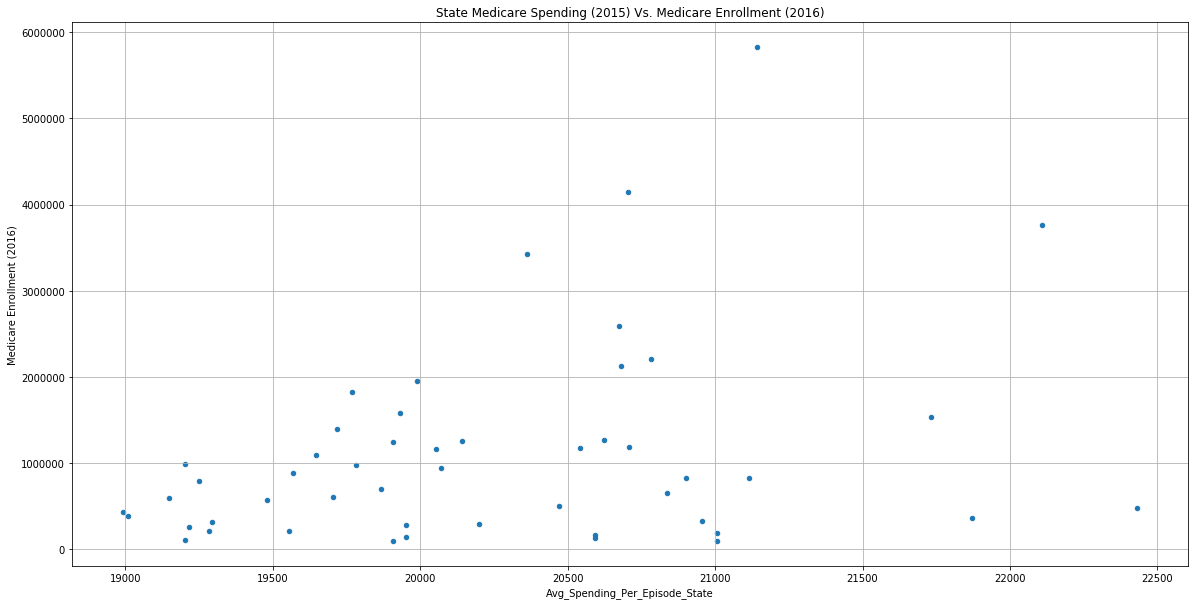

In [199]:
merge_affordable_care_medicare.plot(kind="scatter", x="Avg_Spending_Per_Episode_State", y="Medicare Enrollment (2016)", grid=True, figsize=(20,10),
              title="State Medicare Spending (2015) Vs. Medicare Enrollment (2016)")
plt.show()

In [204]:
affordable_care_statename = affordable_care_statename[["State","Abbreviation", "Medicare Enrollment (2016)", "Employer Health Insurance Coverage (2015)","Marketplace Health Insurance Coverage (2016)","Marketplace Tax Credits (2016)", "Average Monthly Tax Credit (2016)"]]
affordable_care_statename.head()

,State,Abbreviation,Medicare Enrollment (2016),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016)
0,Alabama,AL,989855,2545000,165534,152206,$310
1,Alaska,AK,88966,390000,17995,16205,$750
2,Arizona,AZ,1175624,3288000,179445,124346,$230
3,Arkansas,AR,606146,1365000,63357,56843,$306
4,California,CA,5829777,19552000,1415428,1239893,$309
